In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runCustomScript

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
%%time
example = 'laplace'
script = 'generate_example'
Nsample = 100
lmbda = 0.01
Nf = 500
Nu = 100
noise_level = 0
runCustomScript(script,example,None,Nsample,lmbda,Nf,Nu,noise_level)

### Example = laplace ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 100
Noise: 0%
---------------------------------------
    0.0100

Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100
Step = 58/100
Step = 59/100
Step = 60/100
Step = 61/100
Step = 62

In [3]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(trainRatio = 0.95)

In [4]:
model = GreenNN()
model.build(activation = 'rational')

In [5]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(5000), 'lbfgs':int(0)})

Training with Adam:
Loss at epoch 100: Training = 3.101E-01, Validation = 3.119E-01
Loss at epoch 200: Training = 2.314E-02, Validation = 1.455E-02
Loss at epoch 300: Training = 8.735E-03, Validation = 5.806E-03
Loss at epoch 400: Training = 3.986E-03, Validation = 3.146E-03
Loss at epoch 500: Training = 2.505E-03, Validation = 2.422E-03
Loss at epoch 600: Training = 1.803E-03, Validation = 2.152E-03
Loss at epoch 700: Training = 1.423E-03, Validation = 1.959E-03
Loss at epoch 800: Training = 1.193E-03, Validation = 1.803E-03
Loss at epoch 900: Training = 1.067E-03, Validation = 1.703E-03
Loss at epoch 1000: Training = 9.365E-04, Validation = 1.550E-03
Loss at epoch 1100: Training = 8.590E-04, Validation = 1.458E-03
Loss at epoch 1200: Training = 7.983E-04, Validation = 1.384E-03
Loss at epoch 1300: Training = 7.487E-04, Validation = 1.321E-03
Loss at epoch 1400: Training = 7.067E-04, Validation = 1.266E-03
Loss at epoch 1500: Training = 6.706E-04, Validation = 1.217E-03
Loss at epoch 

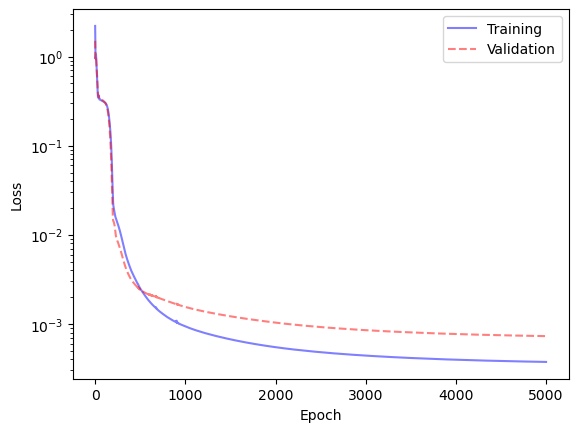

In [6]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

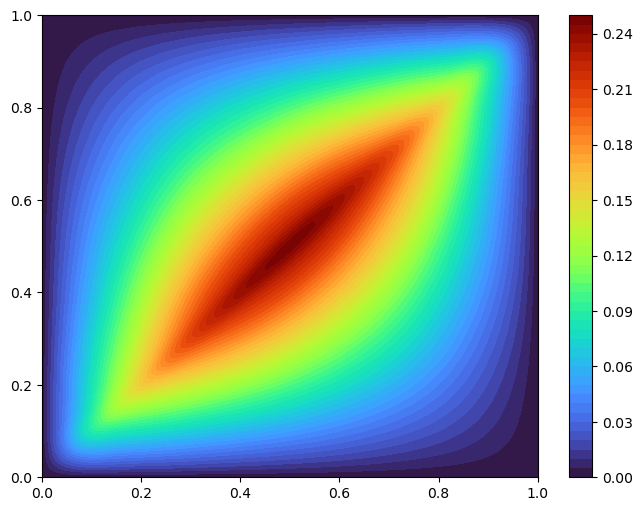

In [7]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [8]:
model.saveModels('savedModels/laplace')

In [9]:
savedModel = GreenNN()
savedModel.build(loadPath = 'savedModels/laplace')

In [10]:
def green(x,s):
    np.random.seed(42)
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    # g = g + np.random.normal(loc = 0.0, scale = 0.25 * eps * factor, size=x.shape)
    return g

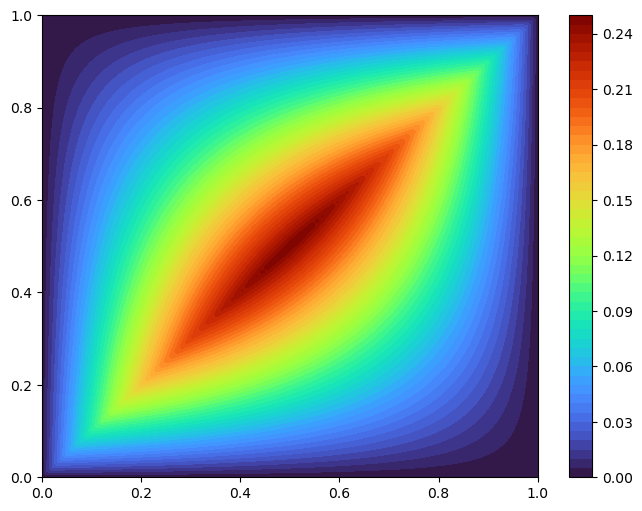

In [11]:
Gexact = green(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gexact, 50, cmap = 'turbo', vmin = np.min(Gexact), vmax = np.max(Gexact))
plt.colorbar()

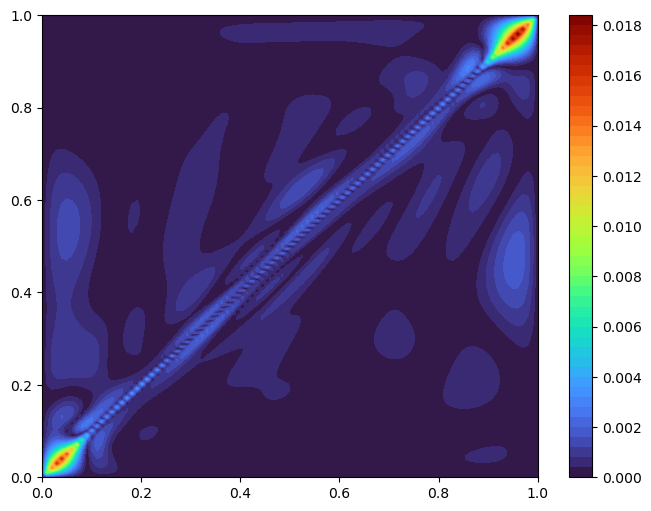

In [12]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,np.abs(G-Gexact), 50, cmap = 'turbo')
plt.colorbar()